# The Optiver puzzle

This notebook shows my answer to [the puzzle](https://www.optiver.com/working-at-optiver/career-opportunities/5841549002/) given by Optiver.  

An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Ant():
    def __init__(self, position=np.array([0, 0]), energy=100):
        # initial position
        self.position = position
        # number of steps
        self.steps = 0
        # stamina, or energy
        self.energy = MAX_STEPS

    def move(self):
        # increase the number of step by 1
        self.steps = self.steps + 1
        # sample moving direction
        s = stats.uniform.rvs()
        if s < 0.25:
            self.position = self.position + np.array([0, 1]) # E
        elif s < 0.5:
            self.position = self.position + np.array([1, 0]) # N
        elif s < 0.75:
            self.position = self.position + np.array([0, -1]) # W
        else:
            self.position = self.position + np.array([-1, 0]) # S
        # moving costs energy
        self.energy = self.energy - 1
    
    def has_energy(self):
        # does it still have energy for moving
        return self.energy > 0

    # 1st question 
    def got_food_rectangle(self):
        # the food is located on east-west lines 20cm to the north and 20cm to the south, 
        # as well as on north-south lines 20cm to the east and 20cm to the west 
        # from the anthill
        deviation = max(np.abs(self.position))
        return deviation == 2

    # 2nd question
    def got_food_diag(self):
        # the food is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points
        return self.position[0] + self.position[1] == 1
    
    # 3rd question
    def got_food_eclipse(self):
        # the food is located outside an area defined by 
        # ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 
        # in coordinate system where the anthill is located at (x = 0cm, y = 0cm)
        x = self.position[0]
        y = self.position[1]
        m = ((x - 2.5/10) / 3)**2 + ((y - 2.5/10) /4)**2
        return m >= 1
        

# 

## Question 1
If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?

*Note: To avoid inifinite moving of the ant, we stop it after a certain number of steps*

In [3]:
MAX_STEPS = 500

In [4]:
steps = []
# the number of trials
N = 10000
for i in range(N):
    ant = Ant(position=np.array([0,0]), energy=MAX_STEPS)
    move = True
    while move:
        ant.move()
        if ant.got_food_rectangle() or not ant.has_energy():
            steps.append(ant.steps)
            move = False
# average steps
sum(steps) / N

4.5196

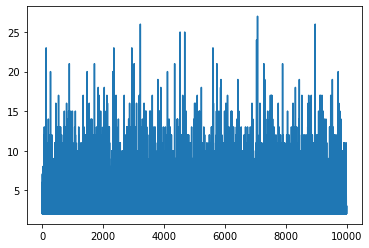

In [5]:
plt.plot(steps)
plt.show()

Analytical result: 4.5

## Question 2:

What is the average time the ant will reach food if it is located only on a diagonal line passing through $(10cm, 0cm)$ and $(0cm, 10cm)$ points?

*Note: As shown in analytical solution, the average number of steps is infinite. However, I provide here the code in case one might one to try out different simulations*

In [7]:
steps = []
N = 1000
for i in range(N):
    ant = Ant(position=np.array([0,0]), energy=MAX_STEPS)
    move = True
    while move:
        ant.move()
        if ant.got_food_diag() or not ant.has_energy():
            steps.append(ant.steps)
            move = False
sum(steps) / N

33.992

Changing the upper bound (i.e. ```MAX_STEPS```) of the number of steps would lead to much different values of average step. The following plot (more or less) confirms that by showing many step counts reach the upper bound

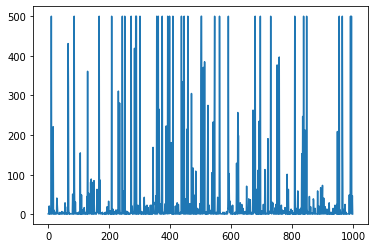

In [8]:
plt.plot(steps)
plt.show()

## Question 3

Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by $( (x – 2.5cm) / 30cm )^2 + ( (y – 2.5cm) / 40cm )^2 < 1$ in coordinate system where the anthill is located at $(x = 0cm, y = 0cm)$? Provide us with a solution rounded to the nearest integer.

In [9]:
steps = []
N = 1000
for i in range(N):
    ant = Ant(position=np.array([0,0]), energy=MAX_STEPS)
    move = True
    while move:
        ant.move()
        if ant.got_food_eclipse() or not ant.has_energy():
            steps.append(ant.steps)
            move = False
sum(steps) / N

13.728

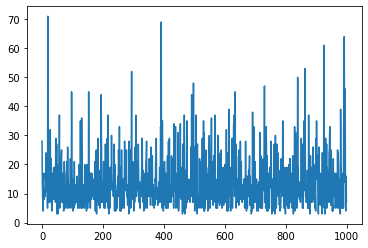

In [10]:
plt.plot(steps)
plt.show()

Nearest integer: 14